In [1]:
install.packages('psych')
install.packages('tidyverse')
install.packages('corrplot')
install.packages('ggplot2')
install.packages('caret')
install.packages('Metrics')


library(psych)          # alternative package to describe your data
library(tidyverse)      # easy way to subset your data
library(corrplot)       # to draw correlation plots
library(ggplot2)        # to plot graphs
library(caret)          # to run machine learning models
library(Metrics)        # to calculate RMSE

options(scipen=999) # turn off scientific notation

Installing package into ‘/Users/joranlokkerbol/Library/R/3.4/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
             binary source needs_compilation
summarytools  0.9.2  0.9.6             FALSE



installing the source package ‘summarytools’


Warning message in install.packages("summarytools"):
“installation of package ‘summarytools’ had non-zero exit status”
Installing package into ‘/Users/joranlokkerbol/Library/R/3.4/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
      binary source needs_compilation
psych 1.8.12  2.0.9             FALSE



installing the source package ‘psych’


Installing package into ‘/Users/joranlokkerbol/Library/R/3.4/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
          binary source needs_compilation
tidyverse  1.2.1  1.3.0             FALSE



installing the source package ‘tidyverse’


Installing package into ‘/Users/joranlokkerbol/Library/R/3.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/wk/2x_6v0ys4jn731ywt_q1hcpw0000gn/T//RtmpR98IbY/downloaded_packages


Installing package into ‘/Users/joranlokkerbol/Library/R/3.4/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.1.0  3.3.2             FALSE



installing the source package ‘ggplot2’


Installing package into ‘/Users/joranlokkerbol/Library/R/3.4/library’
(as ‘lib’ is unspecified)




  There is a binary version available but the source version is later:
      binary source needs_compilation
caret 6.0-81 6.0-86              TRUE



installing the source package ‘caret’


Installing package into ‘/Users/joranlokkerbol/Library/R/3.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/wk/2x_6v0ys4jn731ywt_q1hcpw0000gn/T//RtmpR98IbY/downloaded_packages


Warning message:
“package ‘summarytools’ was built under R version 3.4.4”
Warning message in as.POSIXlt.POSIXct(Sys.time()):
“unknown timezone 'zone/tz/2020d.1.0/zoneinfo/Europe/Amsterdam'”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘readr’ was built under R version 3.4.4”
Warning message:
“package ‘stringr’ was built under R version 3.4.4”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ tibble::view()   masks summarytools::view()

Warning message:
“package ‘corrplot’ was built under R version 3.4.2”
corrplot 0.84 loaded

Loading required package: lattice


Attaching package: ‘caret’


The f

In [2]:

df = read.csv('https://raw.githubusercontent.com/jads-nl/discover-projects/main/pima-indians-diabetes/diabetes.csv')


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to predict whether or not a patient has diabetes, based on diagnostic measurements included in the dataset. 
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.
The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
Link to dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Exercise 1: Familiarize yourself with the data.
Provide a table with descriptive statistics for all included variables and check:
-Classes of each of the variables (e.g. factors or continuous variables).
-Change the class of the "Outcome" variable such that it is a binary factor
-Descriptive/summary statistics for all continuous variables (e.g. mean, SD, range) and factor variables (e.g. frequencies).  
-Explore missing values: sapply(df, function(x) sum(is.na(x)))  

HINT: Use the base-R function "str" (no package needed)
If you are unable to install summarytools, you can use the "describe" function (from the psych"-package) for continuous variables and the "freq" function (base-R) for factor variables.

In [3]:
# To check the structure of the data, you can use the "str"-command:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [5]:
#To create a binary factor (as Outcome has only two levels)
df$Outcome <- as.factor(df$Outcome) ## We need to tell R that our outcome is a binary factor
table(df$Outcome)


  0   1 
500 268 

In [29]:
#Explore missing values: 
sapply(df, function(x) sum(is.na(x))) 

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [8]:
# To describe numeric and integer variables
df %>%
  keep(is.numeric) %>% 
  describe

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Pregnancies,1,768,3.8450521,3.3695781,3.0000,3.4610390,2.9652000,0.000,17.00,17.000,0.8981549,0.1421840,0.12158918
Glucose,2,768,120.8945312,31.9726182,117.0000,119.3798701,29.6520000,0.000,199.00,199.000,0.1730754,0.6193695,1.15371248
BloodPressure,3,768,69.1054688,19.3558072,72.0000,71.3571429,11.8608000,0.000,122.00,122.000,-1.8364126,5.1175100,0.69844253
SkinThickness,4,768,20.5364583,15.9522176,23.0000,19.9366883,17.7912000,0.000,99.00,99.000,0.1089456,-0.5309369,0.57562607
Insulin,5,768,79.7994792,115.2440024,30.5000,56.7451299,45.2193000,0.000,846.00,846.000,2.2633826,7.1331349,4.15850974
BMI,6,768,31.9925781,7.8841603,32.0000,31.9592532,6.8199600,0.000,67.10,67.100,-0.4273073,3.2449627,0.28449513
DiabetesPedigreeFunction,7,768,0.4718763,0.3313286,0.3725,0.4215536,0.2483355,0.078,2.42,2.342,1.9124179,5.5285389,0.01195579
Age,8,768,33.2408854,11.7602315,29.0000,31.5438312,10.3782000,21.000,81.00,60.000,1.1251880,0.6217269,0.42436080


In [10]:
# To describe factor variables
df %>%
  keep(is.factor) %>% 
  freq

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
0,500,65.10417,65.10417,65.10417,65.10417
1,268,34.89583,100.00000,34.89583,100.00000
<NA>,0,NA,NA,0.00000,100.00000
Total,768,100.00000,100.00000,100.00000,100.00000


## Exercise 2: 
The variable "Outcome" refers to the presence of diabetes and hence is the variable of interest for our prediction model ("Y" or dependent variable). 

The frequency of the outcomes (diabetes yes/no) was already determined in the previous code block
Please further explore Y in terms of:
-Describe X-variables separately for both outcome categories (using describeBy(df, group = df$Outcome)
-Draw a correlation plot to see all correlations between Y and the independent (numeric) variables (see HINT 2 below)
-Visualize the relation between Y and a few correlated X-variables (i.e. create boxplot or scatterplot using the "ggplot2"-package)


### HINT 1: For visualisation, ggplot is frequently used as it provides a flexible way to draw a lot of different graphs.
Ggplot contains two basic elements: 
1.The initiation command: ggplot(DATASET, aes(x=XVAR, y=YVAR, group=XVAR)). This draws a blank ggplot. Even though the x and y are specified, there are no points or lines in it.
2.Add the respective geom of interest (for this exercise you'll need "+geom_boxplot()")
The full code to write a boxplot would then be: ggplot(DATASET, aes(x=XVAR, y=YVAR, group=YVAR)) + geom_boxplot()

### HINT 2: 
To draw a correlation plot. Please use the "corrplot"-package. Using this package, one van construct a correlation plot in two steps:
1.Use "cor" to calculate correlation between all combinations of numeric variables (note: there are only numeric variables in the dataset)
2.Plot the calculated correlation by using the "corrplot"-function
Note that Outcome must be transformed back into a numeric variable for this exercise

In [11]:
# ANSWER:
describeBy(df, group=df$Outcome)


 Descriptive statistics by group 
group: 0
                         vars   n   mean    sd median trimmed   mad   min
Pregnancies                 1 500   3.30  3.02   2.00    2.88  2.97  0.00
Glucose                     2 500 109.98 26.14 107.00  108.87 23.72  0.00
BloodPressure               3 500  68.18 18.06  70.00   69.97 11.86  0.00
SkinThickness               4 500  19.66 14.89  21.00   19.08 16.31  0.00
Insulin                     5 500  68.79 98.87  39.00   49.19 57.82  0.00
BMI                         6 500  30.30  7.69  30.05   30.37  7.19  0.00
DiabetesPedigreeFunction    7 500   0.43  0.30   0.34    0.38  0.22  0.08
Age                         8 500  31.19 11.67  27.00   28.98  7.41 21.00
Outcome*                    9 500   1.00  0.00   1.00    1.00  0.00  1.00
                            max  range  skew kurtosis   se
Pregnancies               13.00  13.00  1.11     0.65 0.13
Glucose                  197.00 197.00  0.17     1.85 1.17
BloodPressure            122.00 122.00 

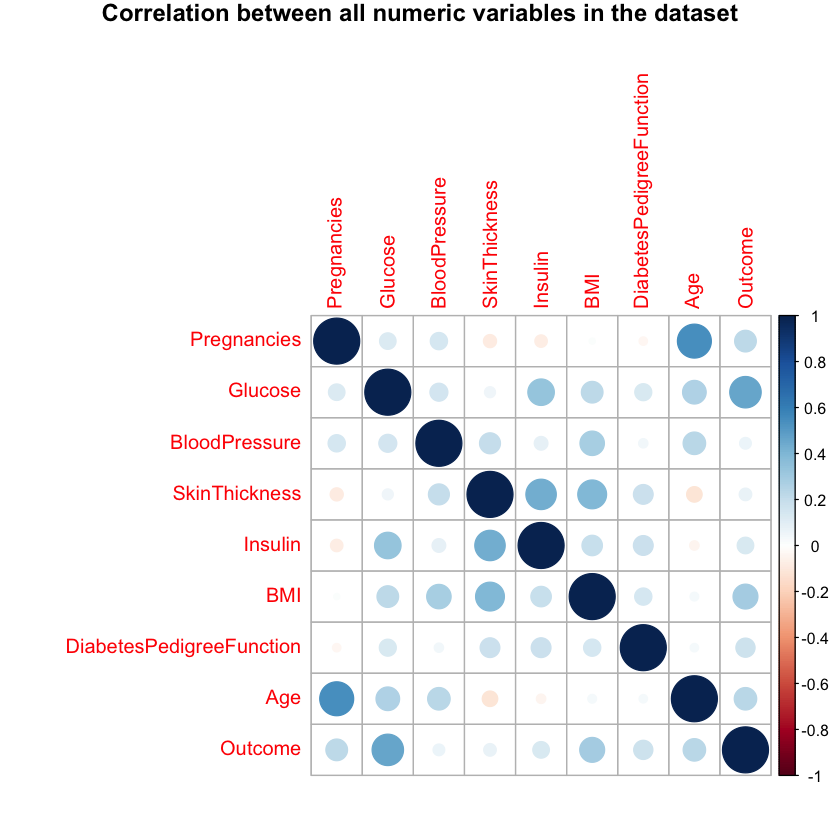

In [28]:
# Correlation plot 
df$Outcome = as.numeric(df$Outcome)
corr_df <- df %>% 
  keep(is.numeric) %>% 
  cor

corrplot(corr_df, number.font=12, tl.cex = 1.00, title="Correlation between all numeric variables in the dataset", mar=c(0,0,1,0))
df$Outcome = as.factor(df$Outcome)

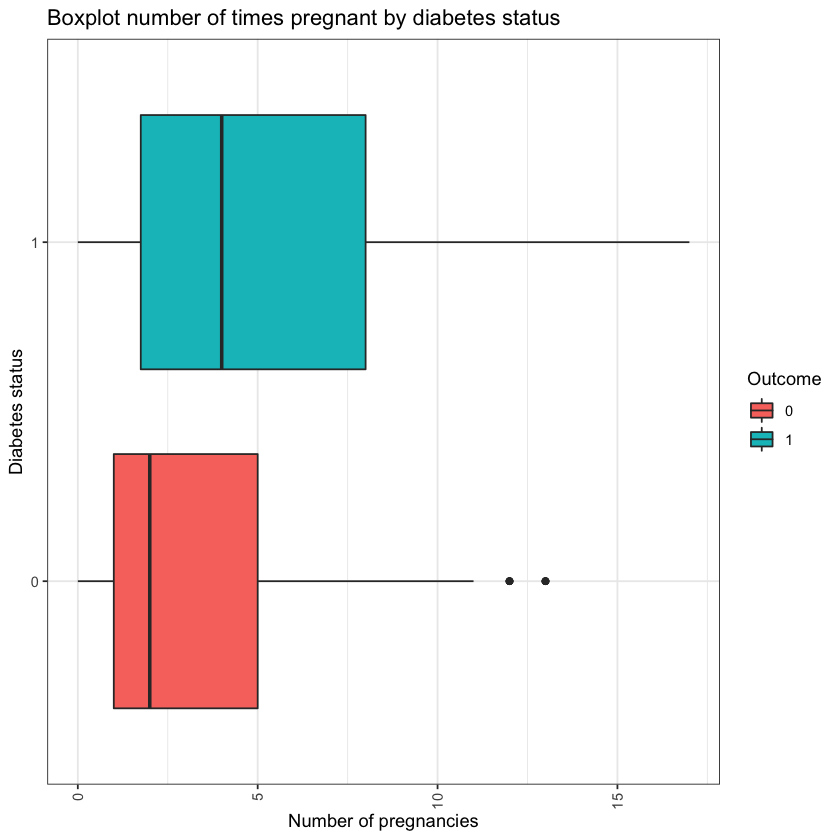

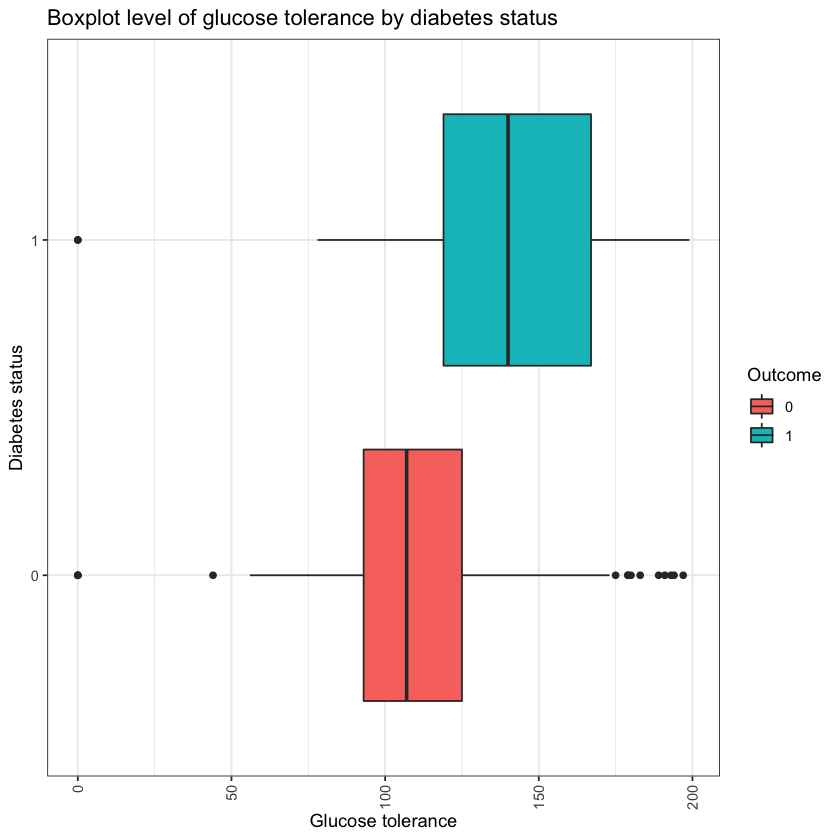

In [14]:
# Construct boxplot
ggplot(df, aes(x=Pregnancies, y=Outcome, group=Outcome)) + 
  geom_boxplot(aes(fill=Outcome)) +
  labs(title="Boxplot number of times pregnant by diabetes status")+
  ylab(label="Diabetes status") + 
  xlab("Number of pregnancies")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

ggplot(df, aes(x=Glucose, y=Outcome, group=Outcome)) + 
  geom_boxplot(aes(fill=Outcome)) +
  labs(title="Boxplot level of glucose tolerance by diabetes status")+
  ylab(label="Diabetes status") + 
  xlab("Glucose tolerance")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


## Exercise 3 
Now that we have a feeling of the information in the dataset and we know that there are no missing values, we can start by running some simple machine learning models.
We will use the "caret"-package for this exercise. 
For this we'll need to split the data in a train and a test set. 
Use the following code to create a train and test dataset:

In [30]:
set.seed (123456789)
dt = sort(sample(nrow(df), nrow(df)*.7)) ## 70% in train set
train<-df[dt,]
test<-df[-dt,]

Do you understand why we are splitting the data? 
Do you understand what has been done in the code above?

Next we need to specify how we want to perform the cross-validation (i.e. the optimization of the model on the train set). To this extend we need to set the method of CV, the number of folds and the numer of times we want to repeat the process.
This can be done using the following command:

In [31]:
# Cross-validation strategy
ctrl <- trainControl(method = "repeatedcv",
                     number = 5,    # ten folds
                     repeats = 3)   # repeated three times

## Exercise 3.1
Once this has been set, we are ready to run the models on the train set. 
Use the syntax below to estimate a linear model, LASSO model and a kNN model on the train set:
Please inspect the outcomes of the model. Which model performs best? 

In [32]:
## Run LM
lm <- train(Outcome ~ ., method = "glm", 
            data = train, 
            trControl = ctrl, 
            preProcess = c("center"))
            
lm # to obtain summary of the model
varImp(lm) # to see most important parameters

Generalized Linear Model 

537 samples
  8 predictor
  2 classes: '1', '2' 

Pre-processing: centered (8) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 429, 430, 429, 430, 430, 429, ... 
Resampling results:

  Accuracy   Kappa    
  0.7666791  0.4577985


glm variable importance

                         Overall
Glucose                  100.000
BMI                       68.661
Pregnancies               33.852
DiabetesPedigreeFunction  27.114
BloodPressure             19.731
Age                       19.036
Insulin                    6.878
SkinThickness              0.000

k-Nearest Neighbors 

537 samples
  8 predictor
  2 classes: '1', '2' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 430, 430, 430, 429, 429, 430, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.7243568  0.3718353
  7  0.7224645  0.3681888
  9  0.7423561  0.4085535

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

ROC curve variable importance

                         Importance
Glucose                     100.000
BMI                          64.700
Age                          55.085
Pregnancies                  31.135
BloodPressure                28.977
DiabetesPedigreeFunction     22.311
SkinThickness                 9.059
Insulin                       0.000

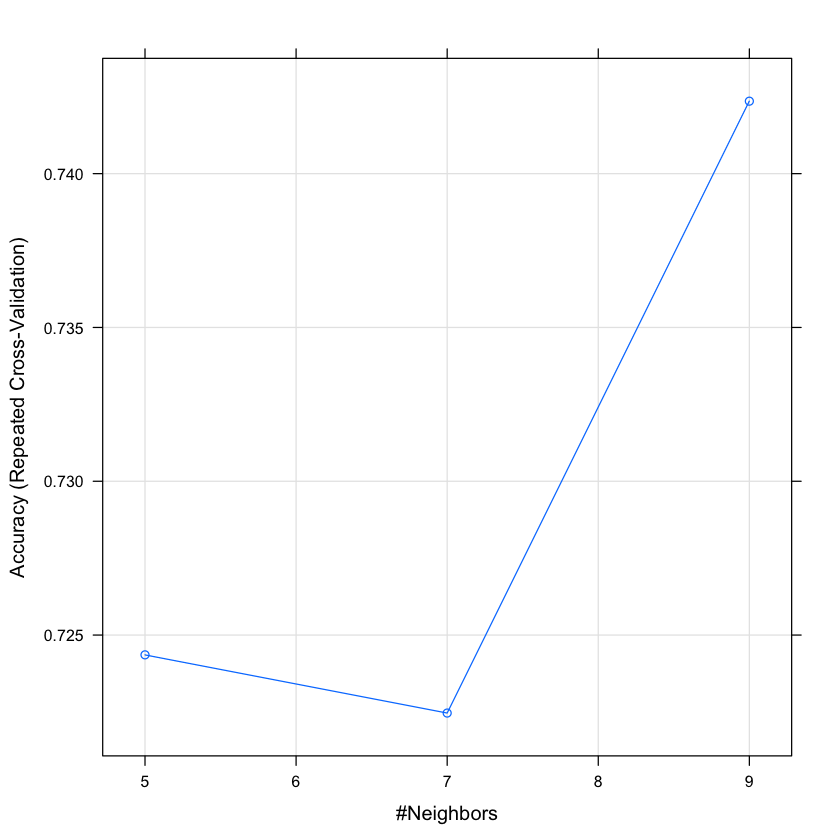

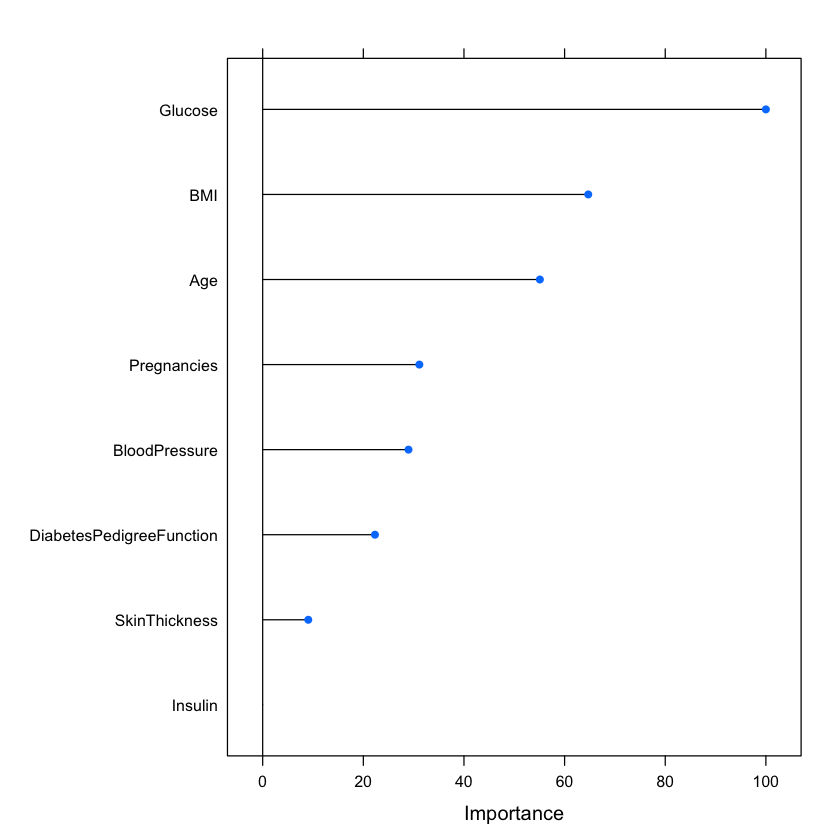

In [33]:
## Run kNN
knnFit <- train(Outcome ~ ., 
                data = train, 
                method = "knn", 
                trControl = ctrl, 
                preProcess = c("center","scale"))

knnFit  # to obtain summary of the model
plot(knnFit)
varImp(knnFit) # to see most important parameters
plot(varImp(knnFit)) # to plot most important parameters

glmnet 

537 samples
  8 predictor
  2 classes: '1', '2' 

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 430, 430, 430, 429, 429, 429, ... 
Resampling results across tuning parameters:

  lambda          Accuracy   Kappa     
     0.001000000  0.7672173  0.45743245
     0.001149757  0.7678346  0.45861802
     0.001321941  0.7672057  0.45673765
     0.001519911  0.7672057  0.45673765
     0.001747528  0.7678346  0.45793612
     0.002009233  0.7678346  0.45793612
     0.002310130  0.7672116  0.45633028
     0.002656088  0.7665943  0.45462407
     0.003053856  0.7678288  0.45702071
     0.003511192  0.7672116  0.45525150
     0.004037017  0.7665885  0.45314826
     0.004641589  0.7659712  0.45204377
     0.005336699  0.7653365  0.44917729
     0.006135907  0.7665826  0.45063783
     0.007054802  0.7690518  0.45536448
     0.008111308  0.7696748  0.45699145
     0.009326033  0.7702979  0.45772941
     0.010722672 

glmnet variable importance

                         Overall
Glucose                   100.00
BMI                        58.77
Pregnancies                24.78
Age                        14.86
DiabetesPedigreeFunction   12.94
BloodPressure               0.00
SkinThickness               0.00
Insulin                     0.00

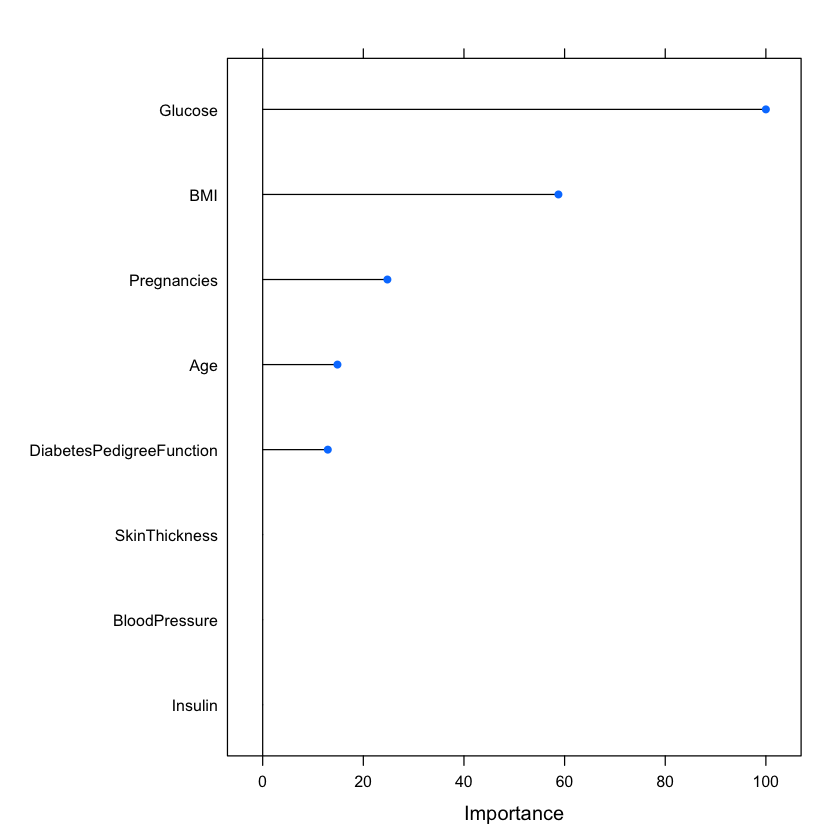

In [34]:
## Run LASSO
lambda <- 10^seq(-3,3,length=100)

lassoFit <- train(Outcome ~ ., 
                  data = train, 
                  method = "glmnet", 
                  trControl = ctrl, 
                  family = "binomial",
                  preProcess = c("center","scale"),
                  tuneGrid = expand.grid(alpha = 1, lambda = lambda))

lassoFit # to obtain summary of the model
varImp(lassoFit) # to see most important parameters
plot(varImp(lassoFit)) # to plot most important parameters

## Exercise 3.4
Now all we have to do is to check the performance of our best performing model on the test dataset. 
Please use the  code below to check this performance.
Which model is best?
Why should you never test all your models straight away on the test dataset, but instead use your training data set first?

In [37]:
## Check performance on test set
# For LM:
print("LM performance")
pred_lm <- predict(lm, newdata = test)
confusionMatrix(pred_lm, test$Outcome)

# For KNN
print("KNN performance")
pred_knn <- predict(knnFit, newdata = test)
confusionMatrix(pred_knn, test$Outcome)

# For LASSO
print("LASSO performance")
pred_lasso <- predict(lassoFit, newdata = test)
confusionMatrix(pred_lasso, test$Outcome)


[1] "LM performance"


Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 132  42
         2  15  42
                                          
               Accuracy : 0.7532          
                 95% CI : (0.6924, 0.8074)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 0.00009813      
                                          
                  Kappa : 0.4274          
                                          
 Mcnemar's Test P-Value : 0.0005736       
                                          
            Sensitivity : 0.8980          
            Specificity : 0.5000          
         Pos Pred Value : 0.7586          
         Neg Pred Value : 0.7368          
             Prevalence : 0.6364          
         Detection Rate : 0.5714          
   Detection Prevalence : 0.7532          
      Balanced Accuracy : 0.6990          
                                          
       'Positive' Class : 1               
                              

[1] "KNN performance"


Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 123  37
         2  24  47
                                          
               Accuracy : 0.7359          
                 95% CI : (0.6741, 0.7916)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 0.0008336       
                                          
                  Kappa : 0.4099          
                                          
 Mcnemar's Test P-Value : 0.1244299       
                                          
            Sensitivity : 0.8367          
            Specificity : 0.5595          
         Pos Pred Value : 0.7688          
         Neg Pred Value : 0.6620          
             Prevalence : 0.6364          
         Detection Rate : 0.5325          
   Detection Prevalence : 0.6926          
      Balanced Accuracy : 0.6981          
                                          
       'Positive' Class : 1               
                              

[1] "LASSO performance"


Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 133  43
         2  14  41
                                          
               Accuracy : 0.7532          
                 95% CI : (0.6924, 0.8074)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 0.00009813      
                                          
                  Kappa : 0.4242          
                                          
 Mcnemar's Test P-Value : 0.0002083       
                                          
            Sensitivity : 0.9048          
            Specificity : 0.4881          
         Pos Pred Value : 0.7557          
         Neg Pred Value : 0.7455          
             Prevalence : 0.6364          
         Detection Rate : 0.5758          
   Detection Prevalence : 0.7619          
      Balanced Accuracy : 0.6964          
                                          
       'Positive' Class : 1               
                              